In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
import joblib

In [2]:
def load_data(filepath):
    """Loads the dataset from the specified file 
    path and returns a pandas DataFrame."""
    return pd.read_csv(filepath, index_col=[0])

In [3]:
features_raw = load_data("Data/training_set_features.csv")
labels_raw = load_data("Data/training_set_labels.csv")

- Features Dataset

In [4]:
def explore(data_frame):
    """
    Prints the Shape, Summary information and Column names of a given DataFrame.

    Parameters:
    - data_frame (pandas.DataFrame): The DataFrame to be explored.

    Returns:
    - None
    """
    print(data_frame.shape)
    print('================================================================')
    print(data_frame.info())
    print('================================================================')
    print(data_frame.columns)

In [5]:
features_raw.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [6]:
explore(features_raw)

(26707, 35)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  heal

|No.| Column    | Description|
|---| ---       | ---         |
|1| `respondent_id` | Unique and random identifier for the respondents|
|2|`h1n1_concern`| Level of concern about H1N1 flu with 0 being not concerned at all and 3 being very concerned|
|3|`h1n1_knowledge`| Level of knowledge about H1N1 with 0 being no knowledge and 2 being a lot of knowledge|
|4|`behavioral_antiviral_meds`| Has taken any antiviral medication (0-no,1-yes)|
|5|`behavioral_avoidance`| Has avoided close contact with anyone with flu-like symptoms (0-no,1-yes)|
|6|`behavioral_face_mask`| Has bought a face mask (0-no,1-yes)|
|7|`behavioral_wash_hands`| Has frequently washed hands or used hand sanitizer (0-no,1-yes)|
|8|`behavioral_large_gatherings`| Has reduced time at large gatherings (0-no,1-yes)|
|9|`behavioral_outside_home`| Has reduced contact with people outside of own household (0-no,1-yes)|
|10|`behavioral_touch_face`| Has avoided touching eyes, nose or mouth (0-no,1-yes)|
|11|`doctor_recc_h1n1`| H1N1 flu vaccine was recommended by doctor (0-no,1-yes)|
|12|`doctor_recc_seasonal`| H1N1 flu vaccine was recommended by doctor (0-no,1-yes)|
|13|`chronic_med_condition`| Has any of the following chronic conditions: asthma or any lung condition, a heart condition, a kidney condition, sickle cell anaemia or any other anaemia, a neurological or neouromuscular condition, a liver condition, or a weakened immune system as a result of a chronic illness or medicines taken for a chronic illness (0-no,1-yes)|
|14|`child_under_6_months`| Has regular close contact with a child under the age of six months (0-no,1-yes)|
|15|`health_worker`| Is a healthcare worker (0-no,1-yes)|
|16|`health_insurance`| Has health insurance (0-no,1-yes)|
|17|`opinion_h1n1_vacc_effective`| Respondent's opinion on the efficacy of the vaccine with 1 being not at all effective and 5 being very effective|
|18|`opinion_h1n1_risk`| Respondent's opinion about risk of getting sick with H1N1 flu without vaccine with 1 being very low and 5 being very high|
|19|`opinion_h1n1_sick_from_vacc`| Respondent's worry of getting sick from H1N1 vaccine with 1 being not worried at all and 5 being very worried|
|20|`opinion_seas_vacc_effective`| Respondent's opinion about seasonal flu vaccine effectiveness with 1 being not effective at all and 5 being very effective|
|21|`opinion_seas_risk`| Respondent's opinion about risk of getting sick with seasonal flu without vaccine with 1 being very low and 5 being very high|
|22|`opinion_seas_vacc_effective`| Respondent's worry of getting sick from taking seasonal flu vaccine with 1 being not worried at all and 5 being very worried|
|23|`age_group`| Age group of respondents|
|24|`education`| Self-reported educational level|
|25|`race`| Race of respondent|
|26|`sex`| Sex of respondent|
|27|`income_poverty`| Household annual income of respondent with respect to 2008 Census poverty thresholds|
|28|`marital status`| Marital status of respondent|
|29|`rent_or_own`| Housing situation of respondent|
|30|`employment_status`| Employment status of respondent|
|31|`hhs_geo_region`| Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings|
|32|`census_msa`| Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census|
|33|`household_adults`| Number of *other* adults in the household, top-coded to 3|
|34|`household_children`| Number of children in the household, top-coded to 3|
|35|`employment_industry`| Type of industry respondent is employed in. Values are represented as short random character strings|
|36|`employment_occupation`| Type of occupation of respondent.Values are represented as short random character strings| 

- Label Dataset

In [7]:
labels_raw.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [8]:
explore(labels_raw)

(26707, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB
None
Index(['h1n1_vaccine', 'seasonal_vaccine'], dtype='object')


## Data Cleaning

1. Missing Values

In [9]:
def identifying_missing_values(data):
    """Identify if the data has missing values"""
    missing = []
    for i in data.isnull().any():
        missing.append(i)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out

In [10]:

def missing_values(data):
    """A simple function to identify data has missing values"""
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

In [11]:

identifying_missing_values(features_raw)
missing_values(features_raw)

The Data has missing values.


,Missing Values,Percentage
employment_occupation,13470,0.504362
employment_industry,13330,0.499120
health_insurance,12274,0.459580
income_poverty,4423,0.165612
doctor_recc_h1n1,2160,0.080878
doctor_recc_seasonal,2160,0.080878
rent_or_own,2042,0.076459
employment_status,1463,0.054780
marital_status,1408,0.052720
education,1407,0.052683


In [12]:
identifying_missing_values(labels_raw)
missing_values(labels_raw)

The Data has no missing values


,Missing Values,Percentage


Handing missing Values for numeric columns

In [13]:
# first, let's make a copy of our original data
features_copy = features_raw.copy()

# numeric features
features_num = features_copy.select_dtypes(exclude='object')

# categorical features
features_cat = features_copy.select_dtypes(include='object') 

In [14]:
# numeric features
# instantiate imputer
imputer = SimpleImputer(strategy='median', missing_values=np.nan)

# fit and transform
imputer.fit(features_num)
num_features = imputer.transform(features_num)
num_features = pd.DataFrame(num_features,
             columns=features_num.columns,
             index=features_copy.index)

# check for missing values
identifying_missing_values(num_features)

The Data has no missing values


In [15]:
# categorical features
# instatiate imputer
imputer2 = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

# fit and transform
imputer2.fit(features_cat)
cat_features = imputer2.transform(features_cat)
cat_features = pd.DataFrame(cat_features,
             columns=features_cat.columns)

# check for missing values
identifying_missing_values(cat_features)

The Data has no missing values


2. Duplicated values

In [16]:
def identify_duplicates(data):
    """Simple function to identify any duplicates"""

    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 


In [17]:

identify_duplicates(features_copy)

The Data has no duplicates


Encoding categorical featutes

In [18]:
# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

encoded_cat = pd.DataFrame(encoder.fit_transform(cat_features),
                            columns=cat_features.columns)

### EDA

In [19]:
def hist_plot(data_frame, column):
    """
    Creates a countplot to visualize the distribution of values in a categorical column of a DataFrame.

    Parameters:
        data_frame (pandas.DataFrame): The DataFrame containing the data.
        column (str): The name of the column from the DataFrame to plot.

    Returns:
        None
    """
    sns.set_style("whitegrid") 
    plt.figure(figsize=(5, 3))
    sns.countplot(data=data_frame, y=data_frame[column])
    plt.title(f'{(column)} Countplot')
    plt.show();

In [20]:
new_features = pd.concat([num_features, encoded_cat],axis=1)


- Labels

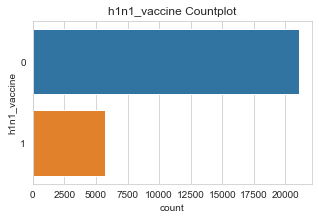

In [21]:
hist_plot(labels_raw, 'h1n1_vaccine')

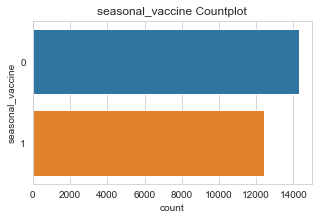

In [22]:
hist_plot(labels_raw, 'seasonal_vaccine')

In [23]:
labels_raw.seasonal_vaccine.value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [24]:
new_label = labels_raw.copy()
new_label.drop(columns=['h1n1_vaccine'], axis=1, inplace=True)

### Univariate

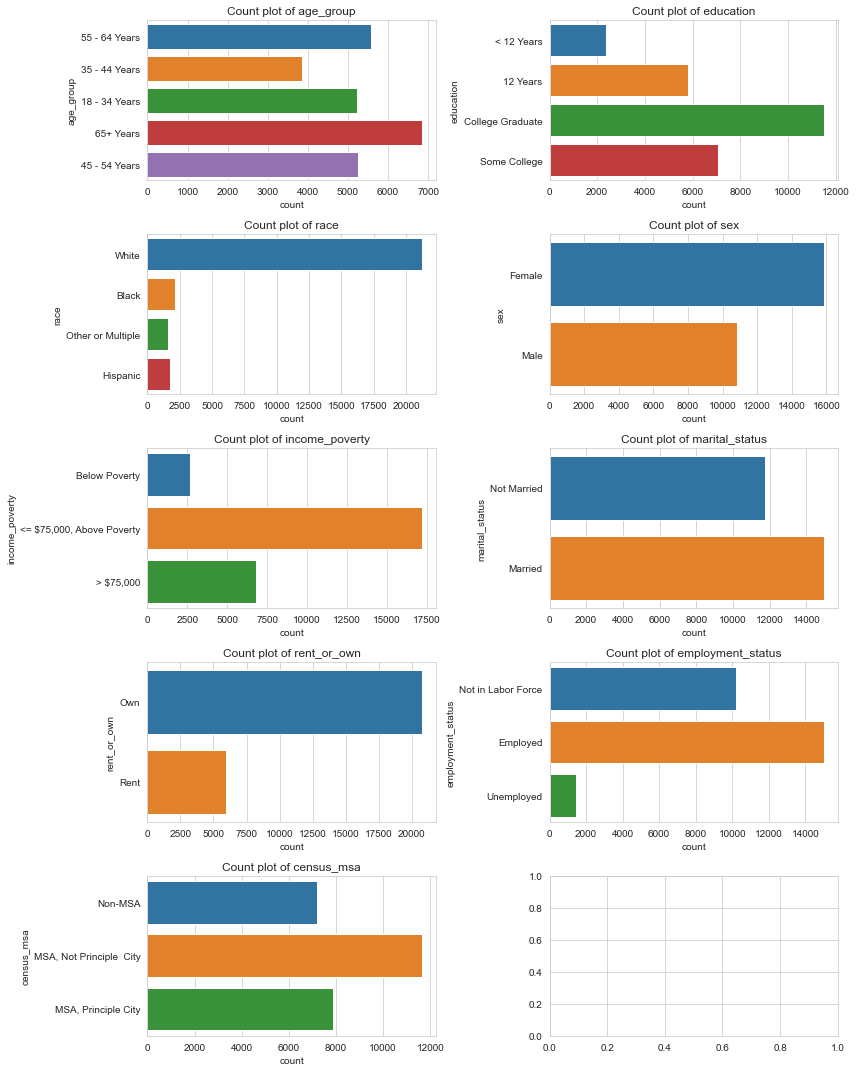

In [31]:
cat_features = cat_features.drop(['employment_industry', 'employment_occupation', 'hhs_geo_region'], axis=1)

num_columns = len(cat_features.columns)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows required

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, num_rows * 3))

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

for i, column in enumerate(cat_features.columns):
    sns.countplot(data=cat_features, y=column, ax=axes[i])
    axes[i].set_title(f'Count plot of {column}')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

**Obervation from the plots:**
- The dataset is predominantly composed of individuals above the age of 65, with relatively low variance across age groups.
- The majority of respondents in the dataset hold a college degree.
- Approximately 80% of the respondents identify as white, indicating a strong representation of this racial group.
- Females constitute approximately 60% of the respondents in the dataset.
- Close to 60% of the respondents report earning an annual income between the poverty line and around $75,000.
- The dataset primarily consists of employed individuals, suggesting that the majority of respondents are currently working
- The majority of respondents in the dataset are married, indicating a prevalent marital status among the surveyed individuals.
-  More than 77% of the respondents own homes rather than renting, suggesting a higher prevalence of homeownership within the dataset.
-  The dataset primarily comprises individuals residing in metropolitan statistical areas but not in principal cities, indicating a focus on suburban or non-central urban areas for data collection.

### Multivariate

- Relationship between `sex` and `seasonal_vaccine` uptake

In [34]:
def multivariate_plot(data_frame, col):
    # create a crosstab
    crosstab = pd.crosstab(data_frame[col],new_label['seasonal_vaccine'],normalize="index")

    plt.figure(figsize=(8, 5))
    crosstab.plot(kind = "barh",stacked = True)
    plt.xlabel("Seasonal vaccine uptake")
    plt.title(f"{col.title()} vs Seasonal flu vaccine uptake")
    plt.tight_layout();

<Figure size 576x360 with 0 Axes>

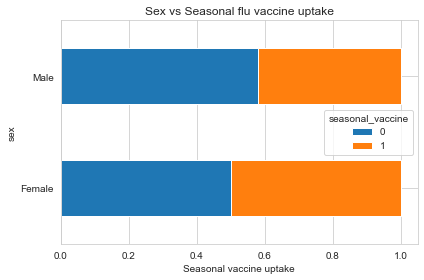

In [35]:
multivariate_plot(cat_features, 'sex')

Based on the analysis, it's observed that the vaccine uptake between genders is nearly equal, although there is a **higher proportion of women taking the seasonal flu vaccine**. This finding suggests that gender may not be a significant factor influencing overall vaccine uptake, but it indicates a *potential trend of higher vaccine acceptance among women in the dataset*. 

- Relationship between `age_group` and `seasonal_vaccine`

<Figure size 576x360 with 0 Axes>

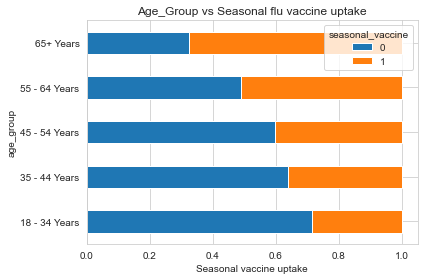

In [36]:
multivariate_plot(cat_features, 'age_group')

The analysis reveals that there is a notable disparity in seasonal vaccine uptake between different age groups. Specifically, **there is a substantial increase in the number of individuals aged 65 years and above who received the seasonal vaccine compared to younger age groups.** This observation highlights the significance of age as a determining factor in seasonal vaccine acceptance, suggesting that *older individuals show a higher propensity to seek and receive the vaccine compared to their younger counterparts.* 

- Relationship between `race` and `seasonal_vaccine`

<Figure size 576x360 with 0 Axes>

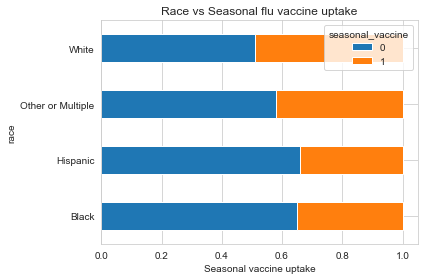

In [37]:
multivariate_plot(cat_features, 'race')

In examining the seasonal vaccine uptake across different racial groups, it was observed that the **vaccine uptake is relatively equal for the Black and Hispanic populations**. However, there is a significantly **higher uptake among the White population**. This finding suggests that *race may play a role in the likelihood of receiving the seasonal vaccine*, with a higher proportion of White individuals opting for vaccination compared to Black and Hispanic individuals. 

- Relationship between repondent's opinions to `seasonal_vaccine`

<Figure size 576x360 with 0 Axes>

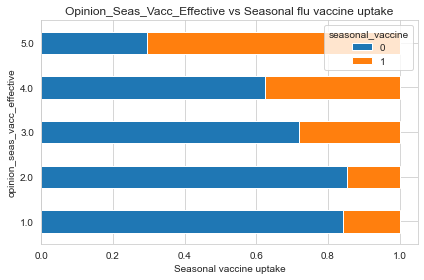

<Figure size 576x360 with 0 Axes>

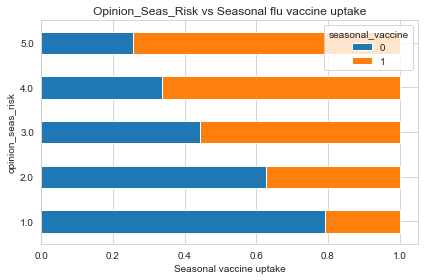

<Figure size 576x360 with 0 Axes>

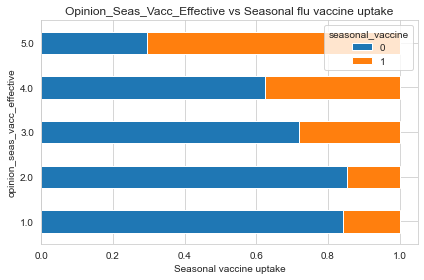

In [43]:
multivariate_plot(new_features,'opinion_seas_vacc_effective')
multivariate_plot(new_features, 'opinion_seas_risk')
multivariate_plot(new_features, 'opinion_seas_vacc_effective')

The analysis indicates a **strong correlation between individuals' beliefs and their likelihood of taking the seasonal flu vaccine**. Specifically, individuals who believe in the effectiveness of the vaccine are more inclined to receive it. Moreover, there is a similar trend observed among individuals who exhibit higher levels of concern regarding the risk of contracting the flu without the vaccine—they are more likely to take the vaccine. These findings underscore the *influence of people's beliefs and risk perceptions* on their vaccination behavior.

- Relationship `health_worker`, `employment_status` and `education` with `seasonal_vaccine`

<Figure size 576x360 with 0 Axes>

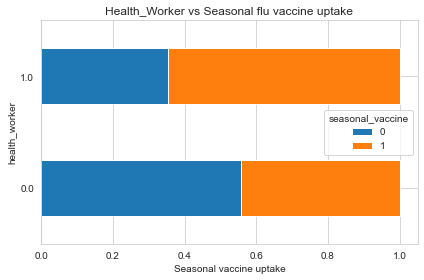

<Figure size 576x360 with 0 Axes>

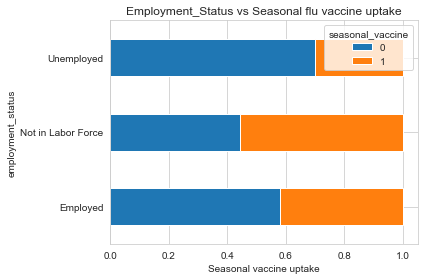

<Figure size 576x360 with 0 Axes>

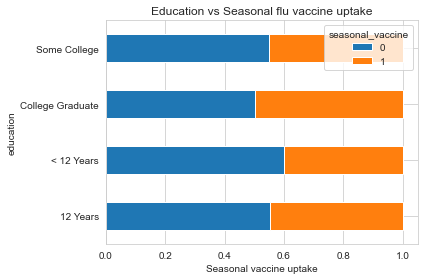

In [48]:
multivariate_plot(new_features, 'health_worker')
multivariate_plot(cat_features, 'employment_status')
multivariate_plot(cat_features, 'education')

Based on the analysis, it was observed that a **significant proportion of health workers have received the seasonal flu vaccine**, indicating a higher vaccination rate among this group. On the other hand, **unemployed individuals exhibited the lowest vaccination rate** compared to the employed and those not in labour force, suggesting a potential correlation between employment status and vaccine uptake.

Regarding educational levels, while no significant changes were observed across different levels of education, it is noteworthy that **college graduates had the highest vaccination rate**. This finding suggests that *higher education attainment may be associated with a greater likelihood* of getting vaccinated against seasonal flu.

## Feature Selection